<a href="https://colab.research.google.com/github/AliyaBadmaeva/PDP/blob/main/Badmaeva_A_A__PDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [ ]:
#!pip install matplotlib

In [ ]:
#!pip install scikit-learn

  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 9.7 MB/s eta 0:00:00
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 10.7 MB/s eta 0:00:00
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
!pip show transformers

Name: transformers
Version: 4.52.4
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /home/aliuska/anaconda3/envs/my_pdp/lib/python3.13/site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 


In [4]:
from transformers import BertTokenizer
from transformers.optimization import get_linear_schedule_with_warmup

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# ссылка на датасет на Гитхабе
#IMDB = 'https://raw.githubusercontent.com/AliyaBadmaeva/imdb/master/IMDB_Dataset.zip'

In [6]:
# Датасет взяла тут:https://www.kaggle.com/datasets/sarath02003/multiclass-sentiment-analysis?select=val_df.csv
train = pd.read_csv('train_df.csv')  # чтение данных с помощью библиотеки Pandas
test = pd.read_csv('test_df.csv')
val = pd.read_csv('val_df.csv')

train.head(10)  # Первые 10 строк датасета

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative
5,3655,Umm yeah. That`s probably a pretty good note ...,2,positive
6,719,whatever do you mean?,1,neutral
7,22823,That would panic me a little! Maybe you can ...,0,negative
8,4869,Is sad when people`s phones are dead,0,negative
9,793,sad face.,0,negative


In [7]:
test.head()

,id,text,label,sentiment
0,9235,getting cds ready for tour,1,neutral
1,16790,"MC, happy mother`s day to your mom ;).. love yah",2,positive
2,24840,A year from now is graduation....i am pretty s...,0,negative
3,20744,because you had chips and sale w/o me,1,neutral
4,6414,Great for organising my work life balance,2,positive


In [8]:
val.head()

,id,text,label,sentiment
0,317,Laying in bed til workkk... Oh the life. Defin...,0,negative
1,24292,ooohhh imma need you to get on that asap love...,2,positive
2,3513,"Thanks! I love it they have a video, so you d...",2,positive
3,4322,I left my ipod in the car so now its all warm.,2,positive
4,6203,Great app. Only complaint is that I'd like the...,2,positive


In [9]:
train.info()  # типы данных для каждого их признаков и количество строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31232 entries, 0 to 31231
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31232 non-null  int64 
 1   text       31232 non-null  object
 2   label      31232 non-null  int64 
 3   sentiment  31232 non-null  object
dtypes: int64(2), object(2)
memory usage: 976.1+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5206 entries, 0 to 5205
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5206 non-null   int64 
 1   text       5205 non-null   object
 2   label      5206 non-null   int64 
 3   sentiment  5206 non-null   object
dtypes: int64(2), object(2)
memory usage: 162.8+ KB


In [11]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5205 non-null   int64 
 1   text       5205 non-null   object
 2   label      5205 non-null   int64 
 3   sentiment  5205 non-null   object
dtypes: int64(2), object(2)
memory usage: 162.8+ KB


In [12]:
train.describe()  # статистические данные

,id,label
count,31232.000000,31232.000000
mean,10576.775359,1.043961
std,8010.753795,0.790636
min,0.000000,0.000000
25%,3476.000000,0.000000
50%,8662.000000,1.000000
75%,17071.500000,2.000000
max,27480.000000,2.000000


In [13]:
train['label'].value_counts()  # количество данных в целевом признаке

label
1    11649
2    10478
0     9105
Name: count, dtype: int64

In [14]:
test['label'].value_counts()

label
1    1930
2    1730
0    1546
Name: count, dtype: int64

In [15]:
val['label'].value_counts()

label
1    1928
2    1760
0    1517
Name: count, dtype: int64

In [16]:
# удалим нулевые значения по наличию в одном из 2х столбцах, чтобы не было потом проблем с созданием тензоров из списка строк
val.dropna(axis=0, how='any', subset=['text', 'label'], inplace=True)
train.dropna(axis=0, how='any',subset=['text', 'label'], inplace=True)
test.dropna(axis=0, how='any', subset=['text', 'label'], inplace=True)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31232 entries, 0 to 31231
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31232 non-null  int64 
 1   text       31232 non-null  object
 2   label      31232 non-null  int64 
 3   sentiment  31232 non-null  object
dtypes: int64(2), object(2)
memory usage: 976.1+ KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5205 entries, 0 to 5205
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5205 non-null   int64 
 1   text       5205 non-null   object
 2   label      5205 non-null   int64 
 3   sentiment  5205 non-null   object
dtypes: int64(2), object(2)
memory usage: 203.3+ KB


In [19]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5205 non-null   int64 
 1   text       5205 non-null   object
 2   label      5205 non-null   int64 
 3   sentiment  5205 non-null   object
dtypes: int64(2), object(2)
memory usage: 162.8+ KB


In [20]:
train.duplicated().sum()  # количество дублей

np.int64(0)

In [21]:
test.duplicated().sum()  # количество дублей

np.int64(0)

In [22]:
val.duplicated().sum()  # количество дублей

np.int64(0)

In [ ]:
'''!pip install --upgrade nbformat
!pip install --upgrade nbconvert'''

'!pip install --upgrade nbformat\n!pip install --upgrade nbconvert'

In [23]:
train.drop(['id','sentiment'],axis=1,inplace=True)
test.drop(['id','sentiment'],axis=1,inplace=True)
val.drop(['id','sentiment'],axis=1,inplace=True)

(array([2.2604e+04, 6.0550e+03, 1.1560e+03, 6.4400e+02, 6.5400e+02,
        6.8000e+01, 2.4000e+01, 8.0000e+00, 8.0000e+00, 7.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,  20.5,  40. ,  59.5,  79. ,  98.5, 118. , 137.5, 157. ,
        176.5, 196. , 215.5, 235. , 254.5, 274. , 293.5, 313. , 332.5,
        352. , 371.5, 391. ]),
 <BarContainer object of 20 artists>)

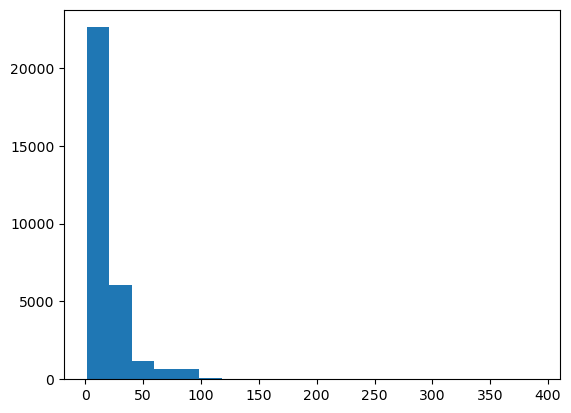

In [24]:
train_rev = [len(t.split()) for t in train['text']]
plt.hist(train_rev, bins=20)

In [27]:
from transformers import BertForSequenceClassification

In [26]:
# Reload it with the huggingface tokenizers library
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', lowercase=False)
tokenizer.save_pretrained('.')

('./tokenizer_config.json',
 './special_tokens_map.json',
 './vocab.txt',
 './added_tokens.json')

In [28]:
X_train = train.text
X_test = test.text
X_val = val.text

y_train = train.label
y_test = test.label
y_val = val.label

In [30]:
MAX_LEN = 100

In [31]:
import torch
encodings_train = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=MAX_LEN, return_tensors='pt')
encodings_val = tokenizer(X_val.tolist(), truncation=True, padding=True, max_length=MAX_LEN, return_tensors='pt')
encodings_test = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=MAX_LEN, return_tensors='pt')

In [ ]:
'''train_seq = torch.tensor(encodings_train['input_ids'])
val_seq = torch.tensor(encodings_val['input_ids'])
test_seq = torch.tensor(encodings_test['input_ids'])

train_mask = torch.tensor(encodings_train['attention_mask'])
val_mask = torch.tensor(encodings_val['attention_mask'])
test_mask = torch.tensor(encodings_test['attention_mask'])

train_labels = torch.tensor(y_train.tolist())
val_labels = torch.tensor(y_val.tolist())
test_labels = torch.tensor(y_test.tolist())'''

In [32]:
labels_tensor_train = torch.tensor(y_train.tolist())
labels_tensor_val = torch.tensor(y_val.tolist())
labels_tensor_test = torch.tensor(y_test.tolist())

class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_ds = NewsDataset(encodings_train, y_train)
valid_ds = NewsDataset(encodings_val, y_val)
test_ds = NewsDataset(encodings_test, y_test)

In [34]:
from transformers import Trainer, TrainingArguments

In [37]:
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=3)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
from torch.optim import AdamW

#model = BERT_architecture(model)
optimizer = AdamW(model.parameters(), lr=1e-5)

In [ ]:
 # !pip install 'accelerate>=0.26.0'

In [ ]:
# ! pip install transformers[torch]

In [40]:
from sklearn.metrics import accuracy_score, precision_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision = precision_score(
        labels, preds, average='micro')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc,
          'precision': precision}

In [43]:
training_args = TrainingArguments(
    output_dir='./my_models',          # выходная директория
    num_train_epochs=3,              # количество эпох
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=8,   # batch size for evaluation
    do_train=True,
    do_eval=True,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    metric_for_best_model="accuracy",
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=valid_ds,
    compute_metrics=compute_metrics     # the callback that computes metrics of interest
) # https://huggingface.co/docs/transformers/main_classes/trainer

In [44]:
# train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.738700,0.650910,0.722574,0.722574,0.722574,0.722574
2,0.561000,0.623149,0.743324,0.743324,0.743324,0.743324
3,0.407900,0.671732,0.740826,0.740826,0.740826,0.740826


TrainOutput(global_step=2928, training_loss=0.5692126268897552, metrics={'train_runtime': 1353.806, 'train_samples_per_second': 69.209, 'train_steps_per_second': 2.163, 'total_flos': 6163168696860672.0, 'train_loss': 0.5692126268897552, 'epoch': 3.0})

In [45]:
# evaluate the current model after training
trainer.evaluate()

{'eval_loss': 0.6231492161750793,
 'eval_accuracy': 0.7433237271853986,
 'eval_f1': 0.7433237271853986,
 'eval_precision': 0.7433237271853986,
 'eval_recall': 0.7433237271853986,
 'eval_runtime': 26.2227,
 'eval_samples_per_second': 198.492,
 'eval_steps_per_second': 24.826,
 'epoch': 3.0}

In [47]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the selected device (GPU or CPU)
model.to(device)

# Get predictions for test data
with torch.no_grad():
    # Move data to device and perform prediction
    preds = model(torch.tensor(encodings_test['input_ids']).to(device), torch.tensor(encodings_test['attention_mask']).to(device))

    # Move the predictions to CPU for further processing
    preds = preds.detach().cpu().numpy()

# Convert predictions to class labels (0 or 1 for binary classification)
pred = np.argmax(preds, axis=1)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(test_y, pred))

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.91 GiB. GPU 0 has a total capacity of 8.00 GiB of which 0 bytes is free. Including non-PyTorch memory, this process has 17179869184.00 GiB memory in use. Of the allocated memory 7.77 GiB is allocated by PyTorch, and 427.01 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
def get_predict(review, Tokenizer=tokenizer, Model=model):
    # Convert Review to a list if it's not already a list
    if not isinstance(text, list):
        text = [text]

    Input_ids, Token_type_ids, Attention_mask = Tokenizer.batch_encode_plus(text,
                                                                             padding=True,
                                                                             truncation=True,
                                                                             max_length=128,
                                                                             return_tensors='pt').values()
    prediction = Model.predict([Input_ids, Token_type_ids, Attention_mask])

    # Use argmax along the appropriate axis to get the predicted labels
    pred_labels = tf.argmax(prediction.logits, axis=1)

    # Convert the TensorFlow tensor to a NumPy array and then to a list to get the predicted sentiment labels
    pred_labels = [label[i] for i in pred_labels.numpy().tolist()]
    return pred_labels

In [ ]:
text = """French film 'Magnificent Trip', released in 2022. It is a very touching film, in which an old lady goes with
            a taxi driver to a nursing home. During the trip, she tells the taxi driver about both difficult life situations
            and the most memorable moments of the 92-year-old lady's life. The film is worthy of an award, it has only
            a few actors, but the level of acting is high, and there are also beautiful views of Paris."""
get_predict(text)